Patch Daddy: 

TO DO

    outlier checks pre stats (AP width terrible)
    tau and sage normalised by V dif for analysis
    build IV curves for pre and post drug aplication
    finish meta loop for APP visuilisation
    handel if drug in/out is not specificed in APP file ... e.g control / put other data_type pAD to analise pAD from -100mV 
    change AP where it means Application to APP also in excel file !


DJ
    pAD_detector : add V_threshold<=-60mV == pAD

   APP files compare V trace in PRE / APP / WASH with APs removed and if >2SD the report:
                                CLASIFY CELL RESPONCE (depol - hyperpol - no change) 
                                TIMESCALE OF RESPONCE  ()

    add compare PRE and DRUG tau and sag [value, V_steady_state, I_injected, resting_membrant_potential] normalised for a similar defelction in V or comparable V value i.e. -100

    AP width correction : " AP width calculation not accurate!! "




In [1]:
#imports, load feature df, set directory and colours

%load_ext autoreload
%autoreload 2


from utils.metabuild_functions import expandFeatureDF, loopCombinations_stats
from utils.plotter import getorbuildApplicationFig, loopbuildAplicationFigs, getorbuildAP_MeanFig, getorbuildAP_HistogramFig, getorbuildAP_PhasePlotFig, getorbuildAP_PCAFig 
from utils.base_utils import *
import openpyxl
import pandas as pd
import numpy as np
import os
import warnings

#CONSTANTS
ROOT = os.getcwd() #This gives terminal location (terminal working dir)
INPUT_DIR = f'{ROOT}/input'
OUTPUT_DIR = f'{ROOT}/output'
CACHE_DIR = f'{ROOT}/cache'

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict)




COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/cache/feature_df_py SUBCACHE


In [8]:

expanded_df = getorbuildExpandedDF(filename, 'feature_df_expanded', expandFeatureDF, from_scratch=False)

# subset df: 
L5b_SIM_df = expanded_df.loc[(expanded_df['cell_type']=='L5b_SIM')& (expanded_df['data_type']=='AP')]
L5b_SIM_df

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


,folder_file,cell_ID,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,WASH_pAD_AP_locs,rheobased_threshold,FI_slope,AP_slope,AP_latency,mouseline,PRE_pAD_AP_locs,tau_rc,WASH_Somatic_AP_locs,AP_height
54,JJB210424/t7,SIM210424a,AP,DMT,1,1,17.0,26.0,patched_firing,NaN,...,[],NaN,NaN,NaN,NaN,SIM,"[151050, 151663, 214034, 243639, 268249, 29749...",NaN,[],NaN
57,JJB210518/t8,SIM210518a,AP,DMT,1,1,9.0,18.0,holding_I,NaN,...,[],NaN,NaN,NaN,NaN,SIM,[221882],NaN,"[1717, 3769]",NaN
62,JJB210518/t30,SIM210518b,AP,DMT,1,1,11.0,21.0,holding_I,NaN,...,"[345835, 104183]",NaN,NaN,NaN,NaN,SIM,[],NaN,"[358037, 360841]",NaN
67,JJB210730/t5,SIM210730a,AP,LSD,1,1,12.0,23.0,holding_I,NaN,...,"[58534, 314941, 24487, 146901, 156025]",NaN,NaN,NaN,NaN,SIM,[],NaN,"[214983, 284136, 249542]",NaN
71,JJB210730/t16,SIM210730b,AP,LSD,1,1,7.0,19.0,holding_I,NaN,...,NaN,NaN,NaN,NaN,NaN,SIM,NaN,NaN,NaN,NaN
75,JJB210730/t28,SIM210730c,AP,PSIL,1,1,9.0,20.0,holding_I,NaN,...,NaN,NaN,NaN,NaN,NaN,SIM,NaN,NaN,NaN,NaN
79,JJB210801/t8,SIM210801a,AP,PSIL,1,1,8.0,20.0,?,NaN,...,[283451],NaN,NaN,NaN,NaN,SIM,[],NaN,"[47633, 292572]",NaN
84,JJB210801/t25,SIM210801b,AP,LSD,1,1,9.0,21.0,holding_I,NaN,...,NaN,NaN,NaN,NaN,NaN,SIM,NaN,NaN,NaN,NaN
500,JJB230203/t11,SIM230203a,AP,TCB2,1,1,28.0,55.0,step,NaN,...,[],NaN,NaN,NaN,NaN,SIM,[],NaN,[],NaN
505,JJB230203/t21,SIM230203b,AP,TCB2,1,1,25.0,50.0,step,NaN,...,[],NaN,NaN,NaN,NaN,SIM,[],NaN,[],NaN


GETTING "feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "SIM210730a Application Figure"


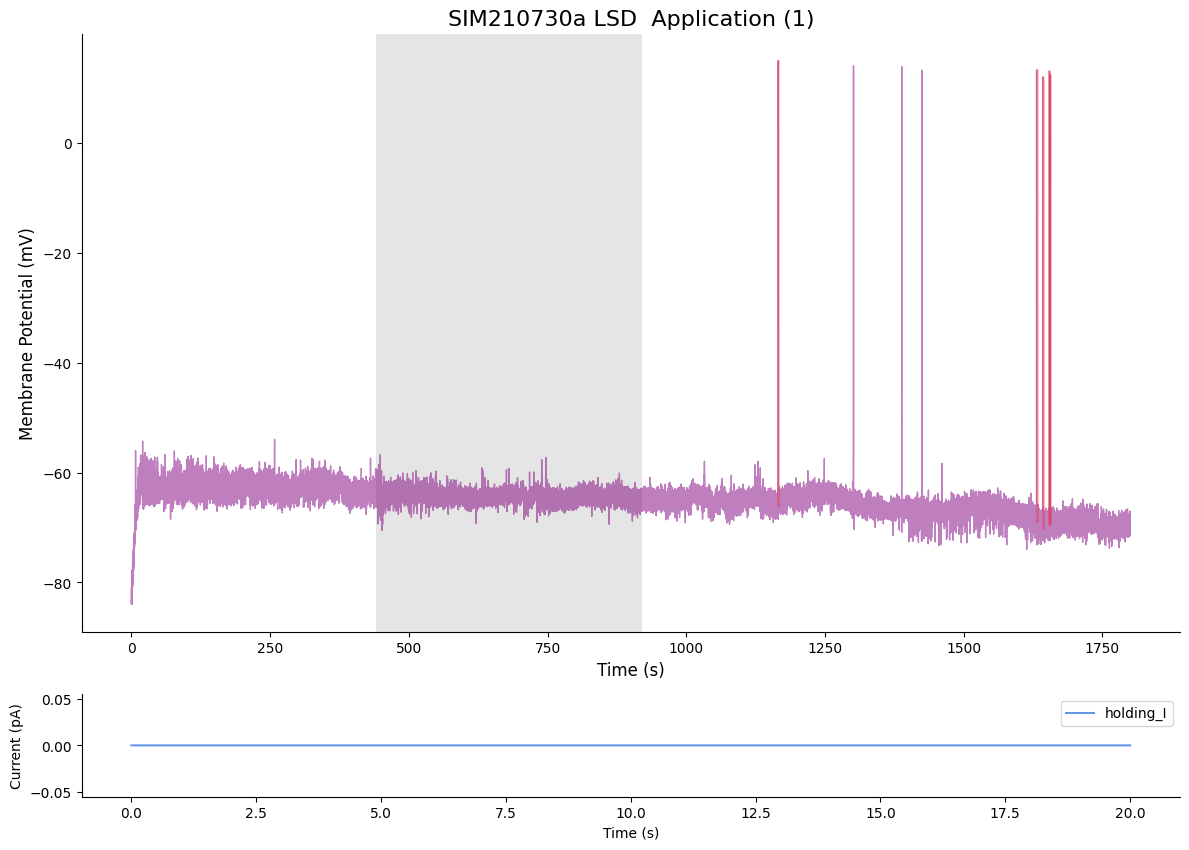

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [4]:
#APPLICATION TRACE PLOTTING


getorbuildApplicationFig(filename, 'SIM210730a', from_scratch=True) #cell_df_or_id


#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell



BUILDING "SIM210730a Mean APs Figure"
(3, 2) (5, 2)
(3, 150) (5, 150)
debugging somatic AP index 0 
214883 100 215033 32
debugging somatic AP index 1 
284036 100 284186 34
debugging somatic AP index 2 
249442 100 249592 35


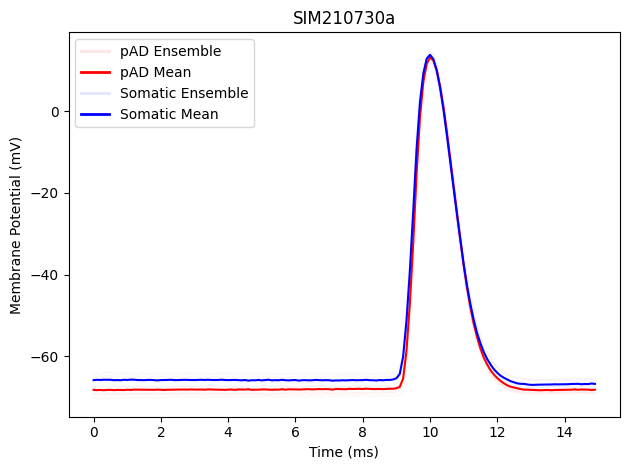

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/SIM210730a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/SIM210730a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:98: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BUILDING "SIM210730a AP Histogram Figure"


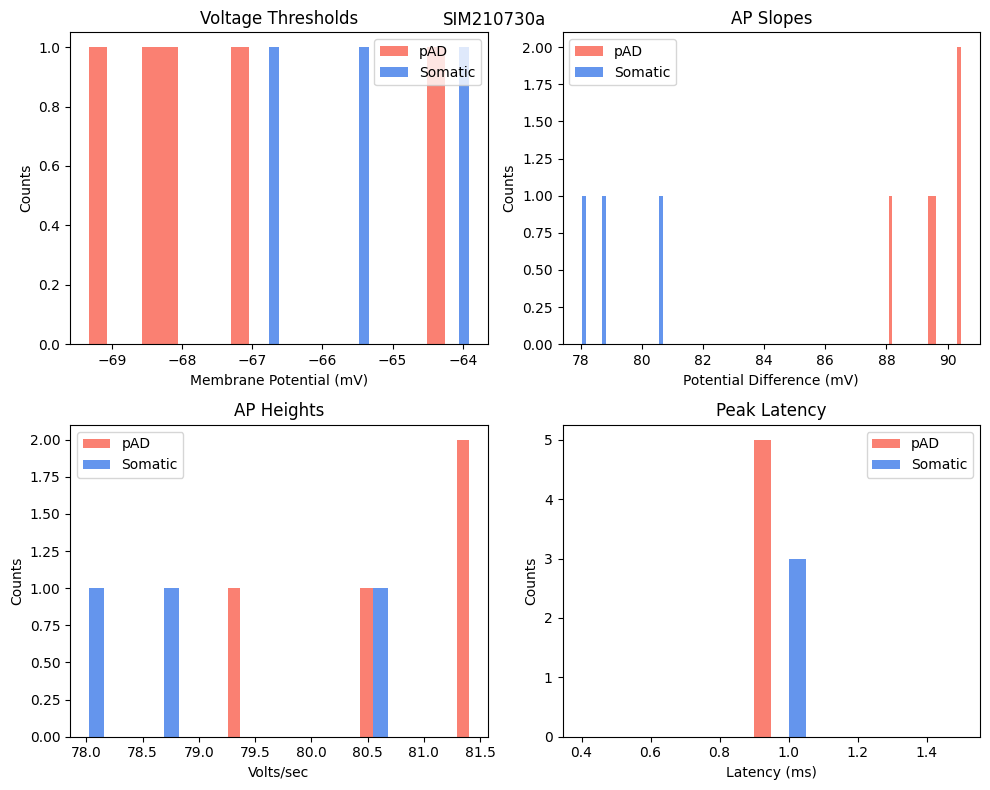

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/SIM210730a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/SIM210730a.png
BUILDING "SIM210730a Phase Plot Figure"


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:168: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


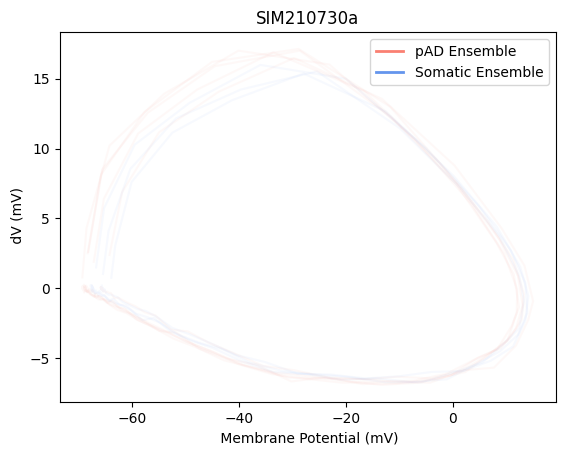

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PhasePlot_APs/SIM210730a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PhasePlot_APs/SIM210730a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:121: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BUILDING "SIM210730a PCA Figure"


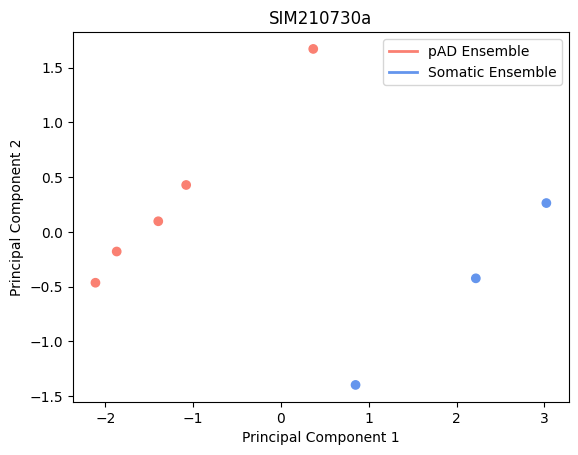

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PCA_APs/SIM210730a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PCA_APs/SIM210730a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:145: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [16]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_ID_or_cell_df
# getorbuildAP_HistogramFig(filename, cell_ID_or_cell_df, from_scratch=True)
# getorbuildAP_PhasePlotFig(filename, cell_ID_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_ID_or_cell_df, from_scratch=None


cell_df = getCellDF(expanded_df, 'SIM210730a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 


In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopCombinations_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_ID,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
906,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
907,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
905,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,73.0,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,73.0,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
